# Desafío - Estimando curvas normales

### 1. Importe un csv desde internet 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import binom
plt.rcParams['figure.figsize']=(10, 6)

plt.rcParams['figure.dpi']=200

### 2. Importe su conjunto de funciones

In [2]:
import ancilliary_funcs as funcs

In [3]:
df = pd.read_csv('qog_std_cs_jan18.csv')
df_v = pd.read_csv('subsample_vgw_demo.csv')
df_e = pd.read_csv('subsample_eaga_demo.csv')

In [4]:
df_v.head()

,Unnamed: 0,cname,undp_hdi,ccodealp,region_recod,ht_region,gle_cgdpc,imf_pop,ffp_hf,wef_qes,wdi_expedu,wdi_ners
0,116,Mozambique,0.414,MOZ,SubSaharian,4,852.39001,25.733,7.4,2.770460,6.48322,19.439980
1,133,Papua New Guinea,0.515,PNG,Pacific,9,1693.54000,6.880,7.1,NaN,NaN,NaN
2,27,Belarus,0.798,BLR,EasterEurope,1,17780.64100,9.468,3.4,NaN,4.99044,99.465446
3,124,Nicaragua,0.642,NIC,LatAm,2,2527.10010,5.946,8.1,2.655975,NaN,NaN
4,56,Estonia,0.863,EST,EasterEurope,1,19768.03900,1.316,3.5,4.364779,5.48164,94.391281


In [5]:
funcs.perdidas(df_v,'undp_hdi', True)

la cantidad de casos perdidos es de : 4
su porcentaje es de:  0.041237113402061855
8                Nauru
49        Korea, North
57    Marshall Islands
75              Tuvalu
Name: cname, dtype: object


In [6]:
df_v.head()

,Unnamed: 0,cname,undp_hdi,ccodealp,region_recod,ht_region,gle_cgdpc,imf_pop,ffp_hf,wef_qes,wdi_expedu,wdi_ners
0,116,Mozambique,0.414,MOZ,SubSaharian,4,852.39001,25.733,7.4,2.770460,6.48322,19.439980
1,133,Papua New Guinea,0.515,PNG,Pacific,9,1693.54000,6.880,7.1,NaN,NaN,NaN
2,27,Belarus,0.798,BLR,EasterEurope,1,17780.64100,9.468,3.4,NaN,4.99044,99.465446
3,124,Nicaragua,0.642,NIC,LatAm,2,2527.10010,5.946,8.1,2.655975,NaN,NaN
4,56,Estonia,0.863,EST,EasterEurope,1,19768.03900,1.316,3.5,4.364779,5.48164,94.391281


### 3. Estime el puntaje Z
 Estime el puntaze Z para las 10 primeras y últimas observaciones de las variables con una menor
cantidad de datos perdidos

- Genere una nueva columna en la tabla de datos mediante funciones vectorizadas. Recuerde
    que para calcular el puntaje z de una observación se utiliza la fórmula: .
    
- Para ordenar los valores pueden utilzar la función sort_values del DataFrame analizado.
    Lean la documentación asociada al argumento by . Para evitar conflictos en la sobreescritura
    
- Asegúrense de eliminar las observaciones que tengan valores perdidos con dropna . Lean la
    documentación asociada al método subset.
    
- Seleccionen las primeras y últimas 10 observaciones de la base reordenada. ¿Qué
    características en común se encuentran?


In [7]:
nombre_columna=[]
contador_na=[]
for colnames, serie in df_v.iteritems():
    nombre_columna.append(colnames)
    contador_na.append(serie.isna().value_counts().get(True))
    
df_temporal= pd.DataFrame(
    {'variable': nombre_columna,
     'perdidos': contador_na })
    
    

In [8]:
df_temporal.sort_values(by='perdidos')

,variable,perdidos
2,undp_hdi,4.0
8,ffp_hf,9.0
9,wef_qes,23.0
7,imf_pop,24.0
10,wdi_expedu,30.0
11,wdi_ners,32.0
0,Unnamed: 0,NaN
1,cname,NaN
3,ccodealp,NaN
4,region_recod,NaN


In [9]:
#agregar como culumna los valores Z de las 3 variables con una menor cantidad de datos perdidos

df_v['ptz_undp_hdi']=(df_v['undp_hdi'] - df_v['undp_hdi'].mean()) /np.std(df_v['undp_hdi'])
df_v['ptz_ffp_hf']=  (df_v['ffp_hf']   - df_v['ffp_hf'].mean()  ) /np.std(df_v['ffp_hf'])
df_v['ptz_wef_qes']= (df_v['wef_qes']  - df_v['wef_qes'].mean() ) /np.std(df_v['wef_qes'])

In [21]:
df_v.head()

,Unnamed: 0,cname,undp_hdi,ccodealp,region_recod,ht_region,gle_cgdpc,imf_pop,ffp_hf,wef_qes,wdi_expedu,wdi_ners,ptz_undp_hdi,ptz_ffp_hf,ptz_wef_qes
0,116,Mozambique,0.414,MOZ,SubSaharian,4,852.39001,25.733,7.4,2.770460,6.48322,19.439980,-1.812582,0.941754,-1.136681
1,133,Papua New Guinea,0.515,PNG,Pacific,9,1693.54000,6.880,7.1,NaN,NaN,NaN,-1.149205,0.787138,NaN
2,27,Belarus,0.798,BLR,EasterEurope,1,17780.64100,9.468,3.4,NaN,4.99044,99.465446,0.709566,-1.119797,NaN
3,124,Nicaragua,0.642,NIC,LatAm,2,2527.10010,5.946,8.1,2.655975,NaN,NaN,-0.315057,1.302526,-1.282078
4,56,Estonia,0.863,EST,EasterEurope,1,19768.03900,1.316,3.5,4.364779,5.48164,94.391281,1.136492,-1.068258,0.888113


In [22]:
df_z = df_v.dropna(subset=['ptz_undp_hdi'])
df_z_orden = df_z.sort_values(by='ptz_undp_hdi')
df_z_orden

,Unnamed: 0,cname,undp_hdi,ccodealp,region_recod,ht_region,gle_cgdpc,imf_pop,ffp_hf,wef_qes,wdi_expedu,wdi_ners,ptz_undp_hdi,ptz_ffp_hf,ptz_wef_qes
60,32,Central African Republic,0.347,CAF,SubSaharian,4,690.03998,NaN,6.9,NaN,1.22393,13.600750,-2.252644,0.684060,NaN
11,125,Niger,0.351,NER,SubSaharian,4,644.53998,NaN,6.9,NaN,6.70941,15.665040,-2.226372,0.684060,NaN
92,34,Chad,0.394,TCD,SubSaharian,4,1651.05000,NaN,8.6,2.528029,2.84971,NaN,-1.943944,1.560220,-1.444569
0,116,Mozambique,0.414,MOZ,SubSaharian,4,852.39001,25.733000,7.4,2.770460,6.48322,19.439980,-1.812582,0.941754,-1.136681
17,70,Guinea,0.414,GIN,SubSaharian,4,993.83002,11.745000,7.2,2.425785,3.20817,31.788179,-1.812582,0.838676,-1.574420
32,139,Guinea-Bissau,0.421,GNB,SubSaharian,4,961.26001,NaN,8.5,NaN,2.17313,NaN,-1.766605,1.508681,NaN
27,97,Liberia,0.427,LBR,SubSaharian,4,488.26999,NaN,6.6,3.472222,2.75756,NaN,-1.727197,0.529444,-0.245439
89,60,Djibouti,0.470,DJI,SubSaharian,4,2685.50000,NaN,5.8,NaN,NaN,NaN,-1.444769,0.117134,NaN
47,103,Malawi,0.473,MWI,SubSaharian,4,938.34998,17.604000,8.1,3.185532,4.84254,32.942291,-1.425065,1.302526,-0.609537
93,0,Afghanistan,0.479,AFG,SouthAsia,8,1282.64000,29.825001,8.1,NaN,3.78028,48.750320,-1.385656,1.302526,NaN


In [12]:
# 10 primeros

df_z_pri10 = df_z_orden[:10]
df_z_pri10.head(10)

,Unnamed: 0,cname,undp_hdi,ccodealp,region_recod,ht_region,gle_cgdpc,imf_pop,ffp_hf,wef_qes,wdi_expedu,wdi_ners,ptz_undp_hdi,ptz_ffp_hf,ptz_wef_qes
60,32,Central African Republic,0.347,CAF,SubSaharian,4,690.03998,NaN,6.9,NaN,1.22393,13.600750,-2.252644,0.684060,NaN
11,125,Niger,0.351,NER,SubSaharian,4,644.53998,NaN,6.9,NaN,6.70941,15.665040,-2.226372,0.684060,NaN
92,34,Chad,0.394,TCD,SubSaharian,4,1651.05000,NaN,8.6,2.528029,2.84971,NaN,-1.943944,1.560220,-1.444569
0,116,Mozambique,0.414,MOZ,SubSaharian,4,852.39001,25.733000,7.4,2.770460,6.48322,19.439980,-1.812582,0.941754,-1.136681
17,70,Guinea,0.414,GIN,SubSaharian,4,993.83002,11.745000,7.2,2.425785,3.20817,31.788179,-1.812582,0.838676,-1.574420
32,139,Guinea-Bissau,0.421,GNB,SubSaharian,4,961.26001,NaN,8.5,NaN,2.17313,NaN,-1.766605,1.508681,NaN
27,97,Liberia,0.427,LBR,SubSaharian,4,488.26999,NaN,6.6,3.472222,2.75756,NaN,-1.727197,0.529444,-0.245439
89,60,Djibouti,0.470,DJI,SubSaharian,4,2685.50000,NaN,5.8,NaN,NaN,NaN,-1.444769,0.117134,NaN
47,103,Malawi,0.473,MWI,SubSaharian,4,938.34998,17.604000,8.1,3.185532,4.84254,32.942291,-1.425065,1.302526,-0.609537
93,0,Afghanistan,0.479,AFG,SouthAsia,8,1282.64000,29.825001,8.1,NaN,3.78028,48.750320,-1.385656,1.302526,NaN


In [13]:
# 10 ultimos

df_z_ul10 = df_z_orden[-10:]
df_z_ul10

,Unnamed: 0,cname,undp_hdi,ccodealp,region_recod,ht_region,gle_cgdpc,imf_pop,ffp_hf,wef_qes,wdi_expedu,wdi_ners,ptz_undp_hdi,ptz_ffp_hf,ptz_wef_qes
55,9,Austria,0.892,AUT,WesterDem,5,38868.039,8.544000,1.5,4.492075,5.49955,NaN,1.326967,-2.099034,1.049780
21,59,France (1963-),0.894,FRA,WesterDem,5,34007.898,64.028000,2.2,4.381113,5.49299,99.444328,1.340103,-1.738263,0.908858
95,101,Luxembourg,0.896,LUX,WesterDem,5,61404.480,0.550000,2.1,4.580255,4.08388,84.603470,1.353239,-1.789802,1.161769
13,90,"Korea, South",0.899,KOR,EastAsia,6,33181.891,50.747002,3.5,3.615234,5.05211,96.776863,1.372943,-1.068258,-0.063813
40,167,Sweden,0.909,SWE,WesterDem,5,39000.910,9.645000,1.5,4.577006,7.67509,96.651558,1.438624,-2.099034,1.157643
33,99,Liechtenstein,0.911,LIE,WesterDem,5,102243.520,NaN,NaN,NaN,2.55604,91.538719,1.451761,NaN,NaN
68,123,New Zealand,0.913,NZL,WesterDem,5,26481.369,4.555000,2.1,5.318371,6.33680,96.440018,1.464897,-1.789802,2.099182
78,186,United States,0.918,USA,WesterDem,5,47769.699,318.789001,1.5,4.564571,5.38078,90.462288,1.497737,-2.099034,1.141851
37,30,Canada,0.919,CAN,WesterDem,5,36577.078,35.495998,2.2,5.245897,5.28122,NaN,1.504306,-1.738263,2.007139
39,48,Denmark,0.923,DNK,WesterDem,5,37406.762,5.627000,1.9,4.812749,8.62711,89.817459,1.530578,-1.892879,1.457039


### 4. Estime el puntaje z de las regiones
Para ello, modifique la función para generar dotplots de la semana pasada, donde deberá agregar
una opción al argumento statistic para calcular el puntaje z.

In [14]:
def dotplot2(dataframe, plot_var, plot_by, global_stat=False, statistic= 'mean'):
    data_frame_mean= round(dataframe.groupby(plot_by)[plot_var].mean(),2)
    data_frame_median= round(dataframe.groupby(plot_by)[plot_var].median(),2)
    data_frame_media_global= dataframe[plot_var].mean()
    
    

    if global_stat==True:
        plt.axvline(dataframe[plot_var].mean(), lw=3, color= 'black', linestyle='--')
        
    if statistic == 'mean':
        plt.plot(data_frame_mean.values, data_frame_mean.index, 'o', color = 'tomato')
    elif statistic =='median':
        plt.plot(data_frame_median.values, data_frame_median.index, 'o', color = 'tomato')
    elif statistic == 'zscore':
        plt.plot(data_frame_mean.values, data_frame_mean.index, 'o', color = 'tomato')

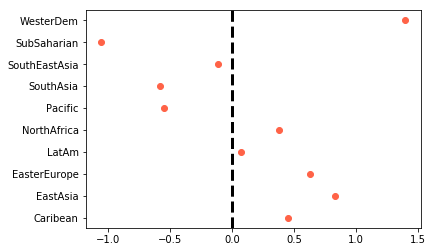

In [15]:
dotplot2(df_v, 'ptz_undp_hdi', 'region_recod', True, 'zscore' )

### 5. Genere un método que devuelva un gráfico comparando dos curvas de densidad
El método debe contener los siguientes argumentos:
- df1 : Tabla de datos 1.
- df2 : Tabla de datos 2.
- variable : Variable a contrastar.
- log : Booleano. Si es True transformar la variable al logaritmo. Por defecto debe ser False .

- Grafique las curvas para imf_pop , gle_cgdpc y undp_hdi . ¿En qué casos es necesario utilizar logaritmos? ¿Por qué?

In [16]:
def compara_graficos(df1, df2, variable, log=False):
    colors = ['tomato', 'darkgoldenrod', 'limegreen', 'dodgerblue']
    
    for i, prob in enumerate ([.3, .6, .9, .95]):
        # grafico 1
        plt.subplot(1,2,1)
        x_axis = np.arange(len(df1[variable]))
        plt.vlines(x_axis, 0, stats.binom(len(df1[variable]), prob).pmf(x_axis),
        colors = colors[i], label = "n={}, p={}".format(len(df1[variable]),prob))
        
        # grafico 2
        plt.subplot(1,2,2)
        x_axis2 = np.arange(len(df2[variable]))
        plt.vlines(x_axis2, 0, stats.binom(len(df2[variable]), prob).pmf(x_axis2),
        colors = colors[i], label = "n={}, p={}".format(len(df2[variable]),prob))

        plt.legend(loc=2, fontsize = 15)
        plt.title("Densidad de la distribución Binomial en distintos p", size = 20)
        plt.xlabel('Cantidad de casos donde p está presente', size = 15)
        plt.ylabel('Densidad', size = 15);
        plt.show()
        return

In [17]:
#compara_graficos(df_e, df_v, 'imf_pop')
df_v.head()

,Unnamed: 0,cname,undp_hdi,ccodealp,region_recod,ht_region,gle_cgdpc,imf_pop,ffp_hf,wef_qes,wdi_expedu,wdi_ners,ptz_undp_hdi,ptz_ffp_hf,ptz_wef_qes
0,116,Mozambique,0.414,MOZ,SubSaharian,4,852.39001,25.733,7.4,2.770460,6.48322,19.439980,-1.812582,0.941754,-1.136681
1,133,Papua New Guinea,0.515,PNG,Pacific,9,1693.54000,6.880,7.1,NaN,NaN,NaN,-1.149205,0.787138,NaN
2,27,Belarus,0.798,BLR,EasterEurope,1,17780.64100,9.468,3.4,NaN,4.99044,99.465446,0.709566,-1.119797,NaN
3,124,Nicaragua,0.642,NIC,LatAm,2,2527.10010,5.946,8.1,2.655975,NaN,NaN,-0.315057,1.302526,-1.282078
4,56,Estonia,0.863,EST,EasterEurope,1,19768.03900,1.316,3.5,4.364779,5.48164,94.391281,1.136492,-1.068258,0.888113


In [18]:
colors = ['tomato', 'darkgoldenrod', 'limegreen', 'dodgerblue']

    for i, prob in enumerate ([.3, .6, .9, .95]):
        x_axis = np.arange(len(df_e['gle_cgdpc']))
        plt.vlines(x_axis, 0, stats.binom(len(df_e['gle_cgdpc']), prob).pmf(x_axis),
        colors = colors[i], label = "n={}, p={}".format(len(df_e['gle_cgdpc']),prob))

        plt.legend(loc=2, fontsize = 15)
        plt.title("Densidad de la distribución Binomial en distintos p", size = 20)
        plt.xlabel('Cantidad de casos donde p está presente', size = 15)
        plt.ylabel('Densidad', size = 15);

IndentationError: unexpected indent (<ipython-input-18-76edbb2c028e>, line 3)